# Polynomial Regression
> Documentation: https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions

## Setup

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Try linear simple regression first

### Prepare independent variable

In [20]:
x = np.random.uniform(-3, 3,(100)).reshape(-1,1)

### Prepare dependent variable

In [21]:
y = x * x - x - 1
error = np.random.rand((100)).reshape(-1, 1)
y = y + error*2
y = y.reshape(-1, 1)

### Simple visualization

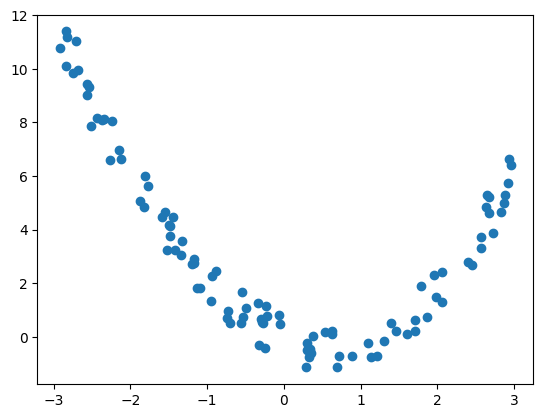

In [22]:
plt.scatter(x, y)

### Split train and test data

In [23]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

### Train the model

In [24]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
model = reg.fit(x_train, y_train)

In [25]:
model.coef_, model.intercept_

(array([[-1.06682069]]), array([2.92210619]))

### Evaluate the model

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

MAE: 2.5980690599917042 MSE: 9.099784112966338 RMSE: 9.099784112966338 R^2 -0.05520353196309258


### Visualiza your result

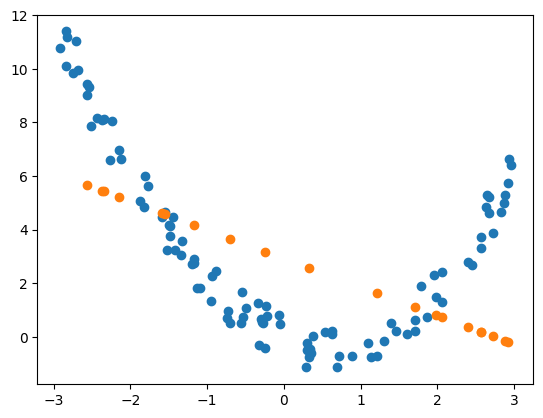

In [27]:
plt.scatter(x, y)
plt.scatter(x_test, y_pred)

### Not so good, isn't it?

## Try polinomial features



In [28]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly_train = poly.fit_transform(x_train.reshape(-1, 1))
poly_test = poly.fit_transform(x_test.reshape(-1, 1))

In [30]:
poly_train

array([[ 1.00000000e+00, -2.21415439e-01,  4.90247965e-02],
       [ 1.00000000e+00,  8.82798409e-01,  7.79333030e-01],
       [ 1.00000000e+00, -1.20022985e+00,  1.44055170e+00],
       [ 1.00000000e+00, -2.74941454e+00,  7.55928031e+00],
       [ 1.00000000e+00,  1.71132250e+00,  2.92862471e+00],
       [ 1.00000000e+00, -2.31539790e-01,  5.36106743e-02],
       [ 1.00000000e+00,  6.28134964e-01,  3.94553532e-01],
       [ 1.00000000e+00, -3.38951626e-01,  1.14888205e-01],
       [ 1.00000000e+00,  3.27167963e-01,  1.07038876e-01],
       [ 1.00000000e+00,  1.78928681e+00,  3.20154729e+00],
       [ 1.00000000e+00, -9.30522244e-01,  8.65871647e-01],
       [ 1.00000000e+00, -1.16500022e+00,  1.35722551e+00],
       [ 1.00000000e+00,  2.06209368e+00,  4.25223035e+00],
       [ 1.00000000e+00,  1.97747580e+00,  3.91041054e+00],
       [ 1.00000000e+00,  1.86782862e+00,  3.48878376e+00],
       [ 1.00000000e+00, -1.17272963e+00,  1.37529479e+00],
       [ 1.00000000e+00, -2.51212989e+00

### Train the model with polynomial features

In [31]:
from sklearn.linear_model import LinearRegression

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_train, y_train)

LinearRegression()

### Evaluate the model

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

y_pred = poly_reg_model.predict(poly_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: {} MSE: {} RMSE: {} R^2 {}'.format(mae, mse, rmse, r2))

MAE: 0.39977800937942537 MSE: 0.23133363450252756 RMSE: 0.23133363450252756 R^2 0.9830047221703548


### Visualize the model

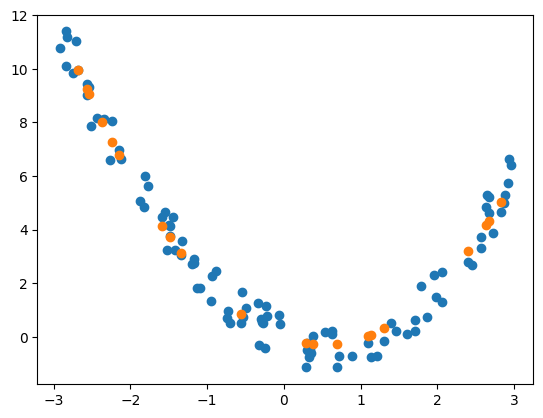

In [33]:
plt.scatter(x, y)
plt.scatter(x_test, y_pred)

### Much better! Isn't it?
Is the degree higher, the result better? How about we do degree as 51?

In [34]:
poly = PolynomialFeatures(degree=51)
poly_train = poly.fit_transform(x_train.reshape(-1, 1))
poly_test = poly.fit_transform(x_test.reshape(-1, 1))
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_train, y_train)
y_pred = poly_reg_model.predict(poly_train)
mae = mean_absolute_error(y_true=y_train,y_pred=y_pred)
mse = mean_squared_error(y_true=y_train,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_train,y_pred=y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print('''Training:
          MAE: {}
          MSE: {}
          RMSE: {}
          R^2 {}'''.format(mae, mse, rmse, r2))

y_pred = poly_reg_model.predict(poly_test)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('''Testing:
          MAE: {}
          MSE: {}
          RMSE: {}
          R^2 {}'''.format(mae, mse, rmse, r2))

Training:
          MAE: 1.138521426987257
          MSE: 2.2881409273868627
          RMSE: 2.2881409273868627
          R^2 0.7867197397384001
Testing:
          MAE: 1.737513719762171
          MSE: 4.058399111064503
          RMSE: 4.058399111064503
          R^2 0.7018435274902803


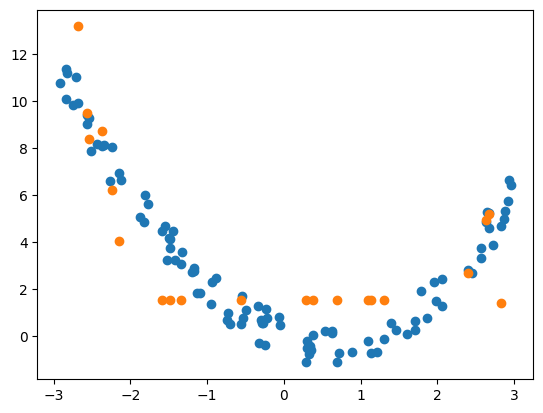

In [35]:
plt.scatter(x, y)
plt.scatter(x_test, y_pred)

### Nope!
High degree polynomial regression may result in Overfitting -- Training result is better, but testing result is poor!